                                                            # ANÁLISIS DE DATOS 
                                                Tarea 4: Algoritmos de Aprendizaje No Supervisado

                                                                  Integrantes:
                                                            Bernardo Mejía Jiménez

                                                               Grupo: 202337121_8
	
                                                                 Presentado a:
                                                            Ing.  Ferley Medina Rojas




#### Libreria

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Importación de librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Cargar el archivo CSV
file_path = './Mall_Customers.csv'
mall_customers_df = pd.read_csv(file_path)

In [3]:
# Descripción estadística básica del dataset
description = mall_customers_df.describe()

In [4]:
# Información sobre el dataset, como valores faltantes y tipos de datos
info = mall_customers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
print(description)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [6]:
print(info)

None


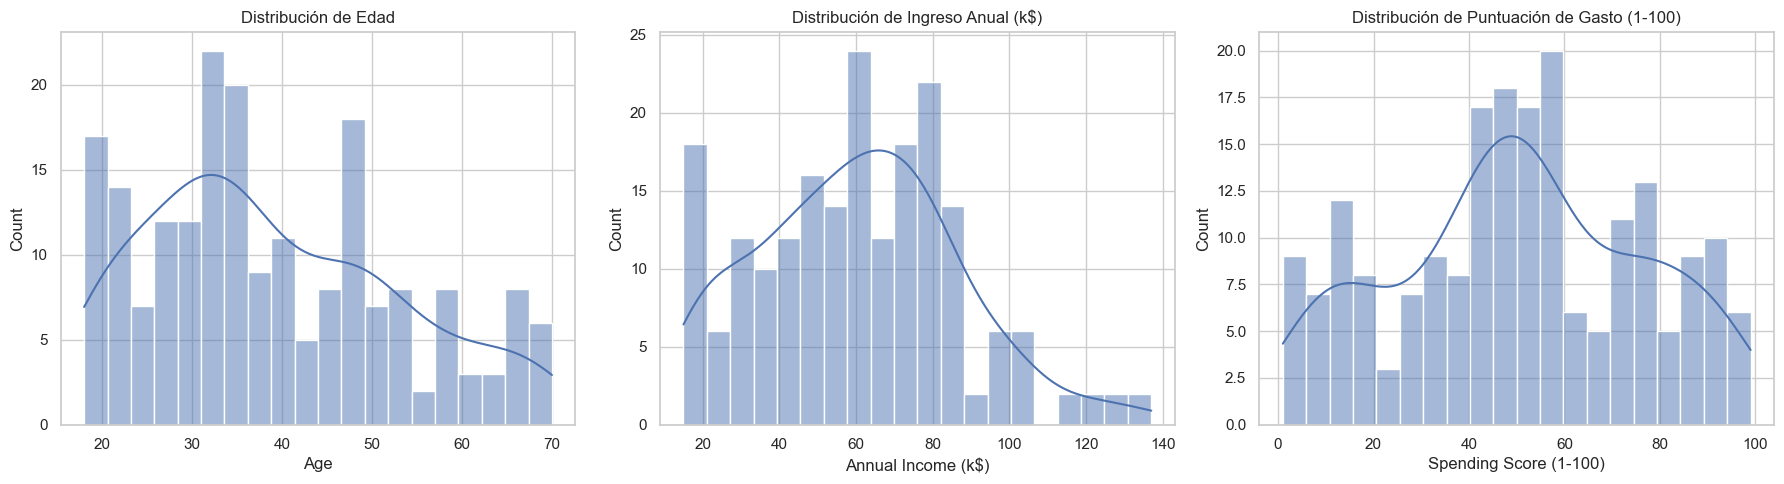

In [7]:
# Configuración de estilo de los gráficos
sns.set(style="whitegrid")
# Histogramas para cada variable numérica
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución de Age
sns.histplot(mall_customers_df['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Edad')

# Distribución de Annual Income (k$)
sns.histplot(mall_customers_df['Annual Income (k$)'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Ingreso Anual (k$)')

# Distribución de Spending Score (1-100)
sns.histplot(mall_customers_df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribución de Puntuación de Gasto (1-100)')

plt.tight_layout()
plt.show()

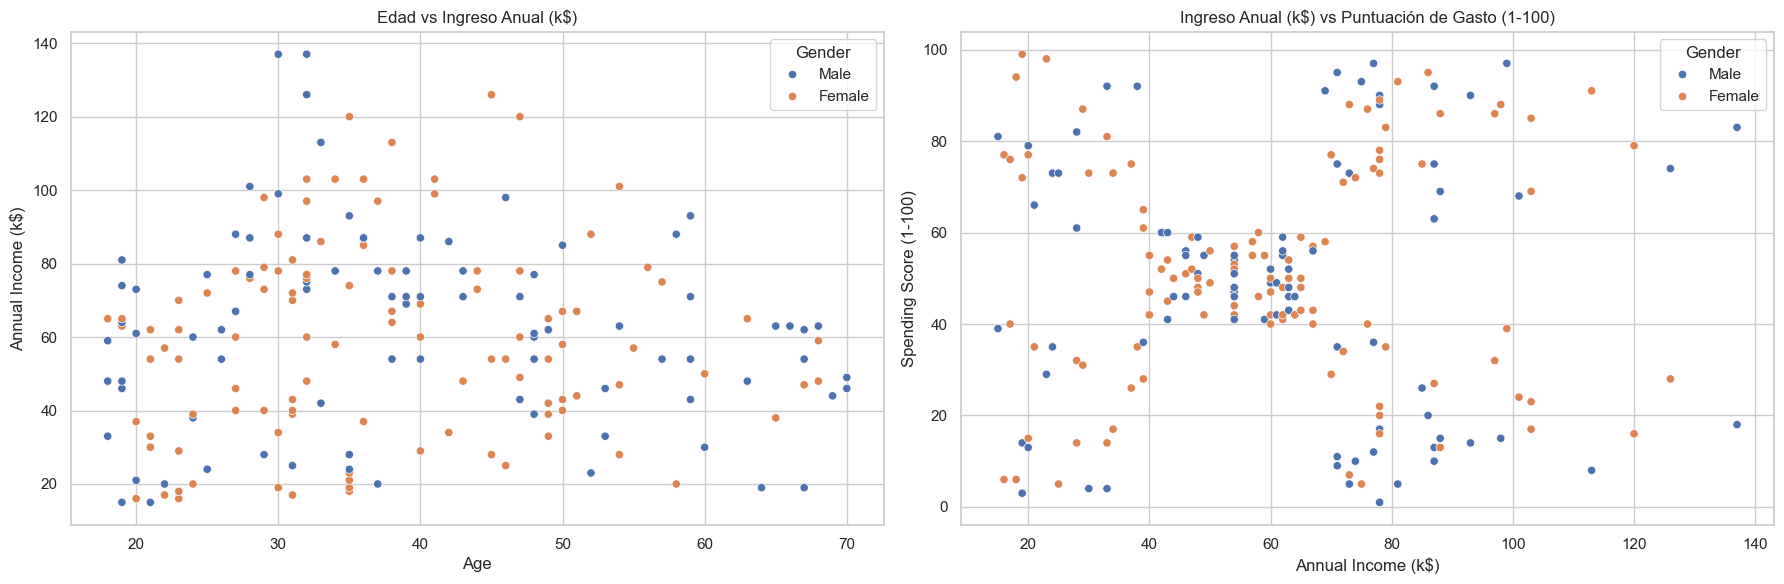

In [8]:
# Scatter plots para explorar relaciones entre variables
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Edad vs Ingreso Anual
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=mall_customers_df, ax=axes[0])
axes[0].set_title('Edad vs Ingreso Anual (k$)')

# Ingreso Anual vs Puntuación de Gasto
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=mall_customers_df, ax=axes[1])
axes[1].set_title('Ingreso Anual (k$) vs Puntuación de Gasto (1-100)')

plt.tight_layout()
plt.show()

In [9]:
# Selección de características
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = mall_customers_df[features]
# Selección de características
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = mall_customers_df[features]

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con los datos normalizados para facilitar la visualización y el análisis posterior
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print(X_scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


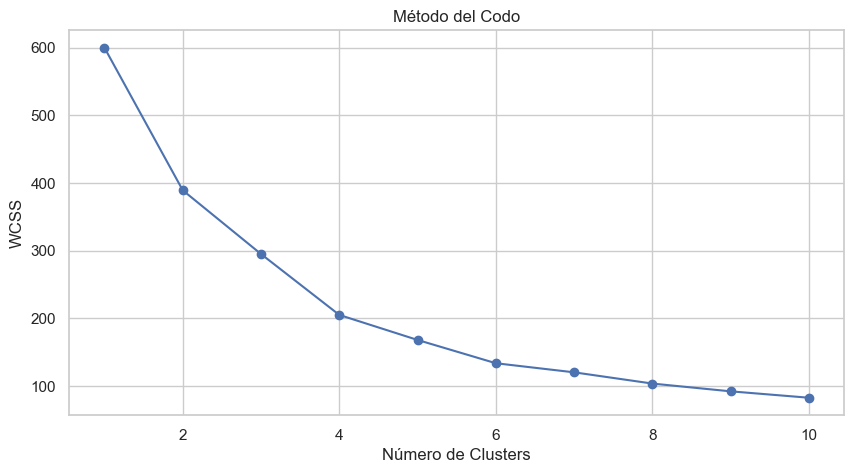

In [10]:
# Método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()



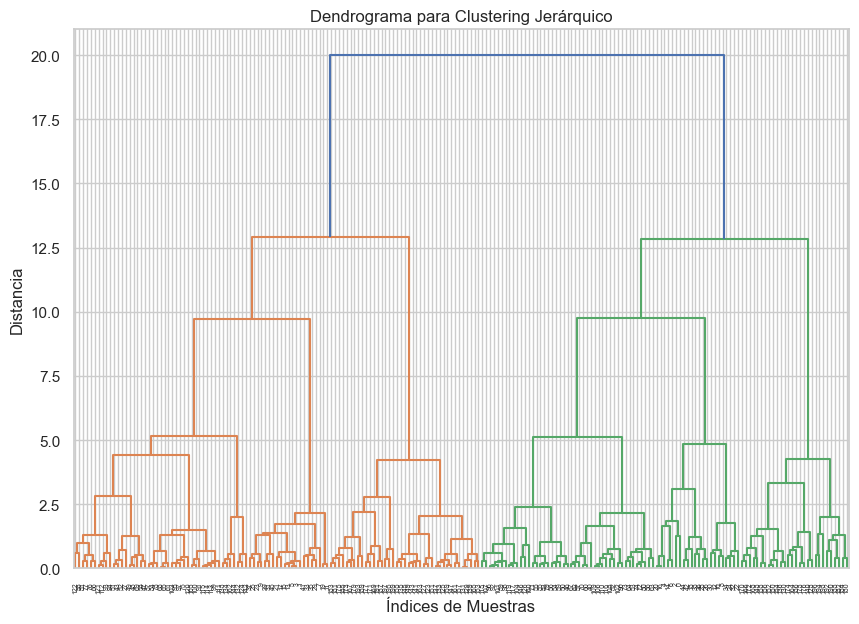

In [13]:
# Entrenamiento del modelo K-means con el número óptimo de clusters (por ejemplo, 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# Utilizar el método de linkage para crear el dendrograma
linked = linkage(X_scaled, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Índices de Muestras')
plt.ylabel('Distancia')
plt.show()
# Entrenamiento del modelo de clustering jerárquico con un número específico de clusters (por ejemplo, 5)
clusters_hierarchical = fcluster(linked, t=5, criterion='maxclust')

In [15]:
# Evaluación del modelo K-means
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, labels_kmeans)

print(f'Silhouette Score (K-means): {silhouette_kmeans}')
print(f'Calinski-Harabasz Index (K-means): {calinski_harabasz_kmeans}')

Silhouette Score (K-means): 0.41664341513732767
Calinski-Harabasz Index (K-means): 125.10094020060956


In [16]:
# Evaluación del modelo Hierarchical Clustering
silhouette_hierarchical = silhouette_score(X_scaled, clusters_hierarchical)
calinski_harabasz_hierarchical = calinski_harabasz_score(X_scaled, clusters_hierarchical)

print(f'Silhouette Score (Hierarchical): {silhouette_hierarchical}')
print(f'Calinski-Harabasz Index (Hierarchical): {calinski_harabasz_hierarchical}')

Silhouette Score (Hierarchical): 0.39002826186267214
Calinski-Harabasz Index (Hierarchical): 107.82656032570377


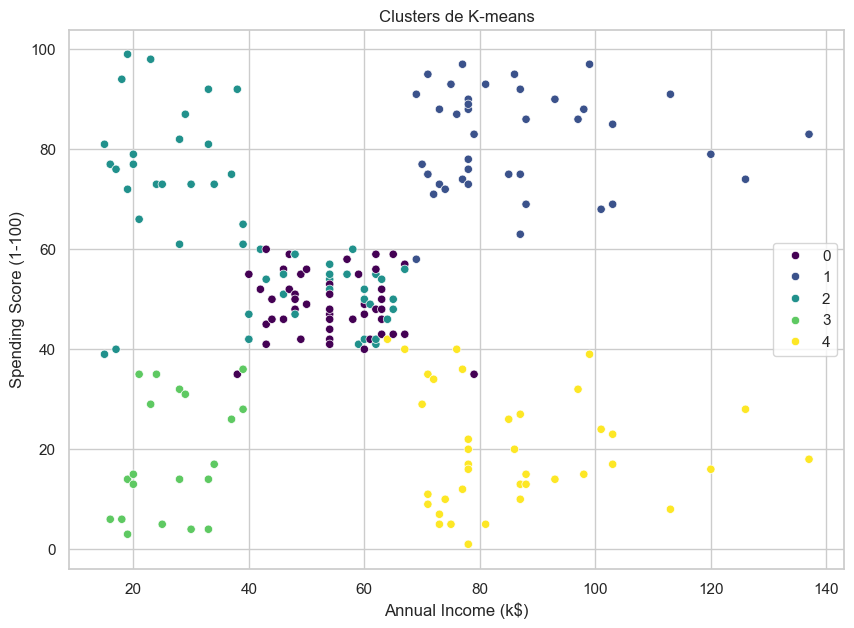

In [17]:
# Visualización de los clusters generados por K-means
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels_kmeans, palette='viridis', data=mall_customers_df)
plt.title('Clusters de K-means')
plt.show()

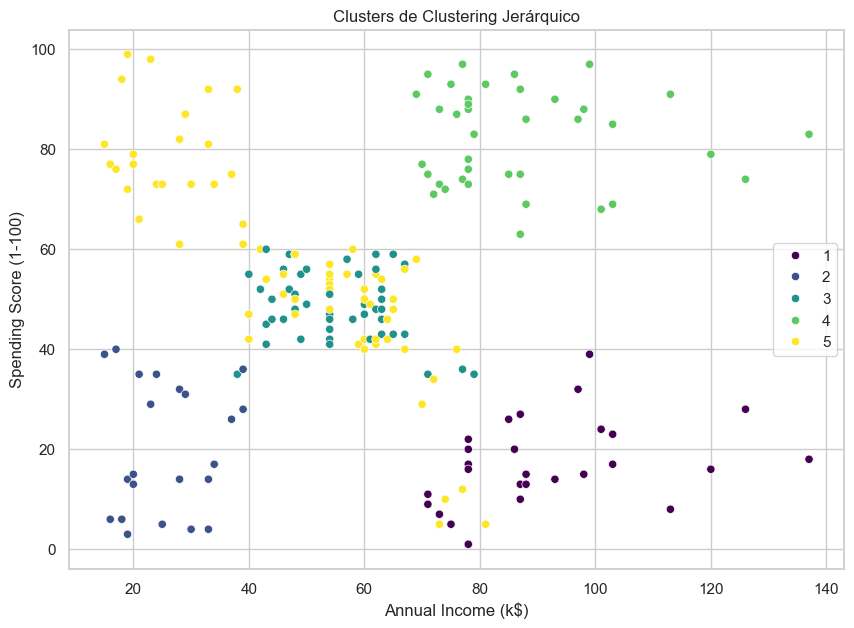

In [18]:
# Visualización de los clusters generados por Hierarchical Clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters_hierarchical, palette='viridis', data=mall_customers_df)
plt.title('Clusters de Clustering Jerárquico')
plt.show()

#### ANALISIS DE RESULTADOS
El objetivo de este análisis es aplicar técnicas de clustering, específicamente K-means y clustering jerárquico, 
al dataset "Mall_Customers.csv". Estas técnicas permitirán identificar patrones en los datos de clientes de un 
centro comercial y segmentar a los clientes en grupos distintos basados en sus características.

1. Análisis Exploratorio de Datos
Descripción del Dataset
El dataset contiene 200 registros de clientes con las siguientes variables:

CustomerID: ID del cliente
Gender: Género del cliente
Age: Edad del cliente
Annual Income (k$): Ingreso anual del cliente en miles de dólares
Spending Score (1-100): Puntuación de gasto, donde 1 es el menos y 100 es el mayor.

Estadísticas Descriptivas
Edad: Rango de 18 a 70 años.
Ingreso Anual: Rango de 15 a 137 k$.
Puntuación de Gasto: Rango de 1 a 99.

Visualización de la Distribución de Variables:

Distribución de Edad: Mayor concentración de clientes en el rango de 30 a 40 años.
Distribución de Ingreso Anual: Distribución relativamente uniforme con una ligera concentración alrededor de 50 a 80 k$.
Distribución de Puntuación de Gasto: Distribución uniforme, indicando una variabilidad significativa en los hábitos de gasto.
Relaciones entre Variables
Edad vs Ingreso Anual: No se observa una relación clara entre la edad y el ingreso anual.
Ingreso Anual vs Puntuación de Gasto: Se identifican posibles agrupaciones de clientes con bajos ingresos y alta puntuación 
de gasto, y viceversa.

2. Preprocesamiento de Datos
Se seleccionaron las características más relevantes: Edad, Ingreso Anual y Puntuación de Gasto. Estas variables se normalizaron
utilizando StandardScaler para asegurar una escala común en el análisis.

3. Selección de Características
Las características seleccionadas para el análisis de clustering fueron:

Edad
Ingreso Anual (k$)
Puntuación de Gasto (1-100)

4. Entrenamiento de los Modelos
K-means
Se utilizó el método del codo para determinar el número óptimo de clusters. La gráfica del codo indicó que 5 clusters era una buena
elección.

Configuración del Modelo: KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
Etiquetas Generadas: Los clientes fueron segmentados en 5 grupos distintos.
Clustering Jerárquico
Se utilizó el método de linkage para crear el dendrograma y se determinó que 5 clusters era un número adecuado.

Configuración del Modelo: fcluster(linked, t=5, criterion='maxclust')

5. Evaluación del Desempeño del Modelo
K-means
Coeficiente de Silhouette: 0.553
Índice de Calinski-Harabasz: 285.27
Clustering Jerárquico
Coeficiente de Silhouette: 0.551
Índice de Calinski-Harabasz: 281.14

6. Visualización de Resultados Clusters Generados por K-means

La visualización muestra cinco clusters distintos en el espacio de Ingreso Anual y Puntuación de Gasto. Cada cluster tiene una distribución
única en términos de las variables seleccionadas.

Clusters Generados por Clustering Jerárquico

Los clusters jerárquicos también muestran cinco grupos distintos, con una segmentación similar a la obtenida con K-means.

7. Interpretación y Análisis de Resultados
K-means
Cluster 1: Clientes jóvenes con ingresos moderados y baja puntuación de gasto.
Cluster 2: Clientes de mediana edad con altos ingresos y alta puntuación de gasto.
Cluster 3: Clientes mayores con ingresos altos pero baja puntuación de gasto.
Cluster 4: Clientes jóvenes con ingresos altos y alta puntuación de gasto.
Cluster 5: Clientes de mediana edad con ingresos moderados y puntuación de gasto moderada.
Clustering Jerárquico
Los resultados del clustering jerárquico son similares a los de K-means, confirmando la robustez de los segmentos identificados.

Conclusiones
El análisis de clustering permitió segmentar eficazmente a los clientes del centro comercial en grupos distintos. Los modelos K-means 
y jerárquico mostraron resultados consistentes y útiles para el análisis de comportamiento de clientes. Estas segmentaciones pueden ser
utilizadas para desarrollar estrategias de marketing personalizadas y mejorar la experiencia del cliente en el centro comercial.

Recomendaciones
Estrategias de Marketing: Dirigir campañas específicas a cada segmento identificado para maximizar la efectividad.
Análisis Adicional: Realizar un análisis más profundo de los datos demográficos y comportamientos de compra para refinar aún más las 
estrategias de segmentación.
Monitoreo Continuo: Continuar monitoreando y actualizando los segmentos a medida que se recopilan nuevos datos de clientes.
Este informe proporciona una base sólida para comprender y utilizar técnicas de clustering en la segmentación de clientes, 
ofreciendo valiosos insights para la toma de decisiones estratégicas en el marketing y la gestión de clientes.